# Step 1: Reading and Understanding the Data
 
  following are the steps:
    1. Importing data using pandas library
    2. Understanding the structure of the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Lib for linear regression model building
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
# Load the dataset
df = pd.read_csv('day.csv')

# 1.2 Data Understanding and Cleaning

In [5]:
# Preview data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Check for null values
print("Null values in each column:\n", df.isnull().sum())

Null values in each column:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [8]:
# Convert 'season' and 'weathersit' to categorical labels
df['season'] = df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df['weathersit'] = df['weathersit'].map({
    1: 'Clear', 
    2: 'Mist', 
    3: 'Light Snow/Rain', 
    4: 'Heavy Rain/Snow'
})

In [9]:
# Convert 'yr' column from 0/1 to actual years
df['yr'] = df['yr'].map({0: 2018, 1: 2019})

# 1.3 Exploratory Data Analysis (EDA)

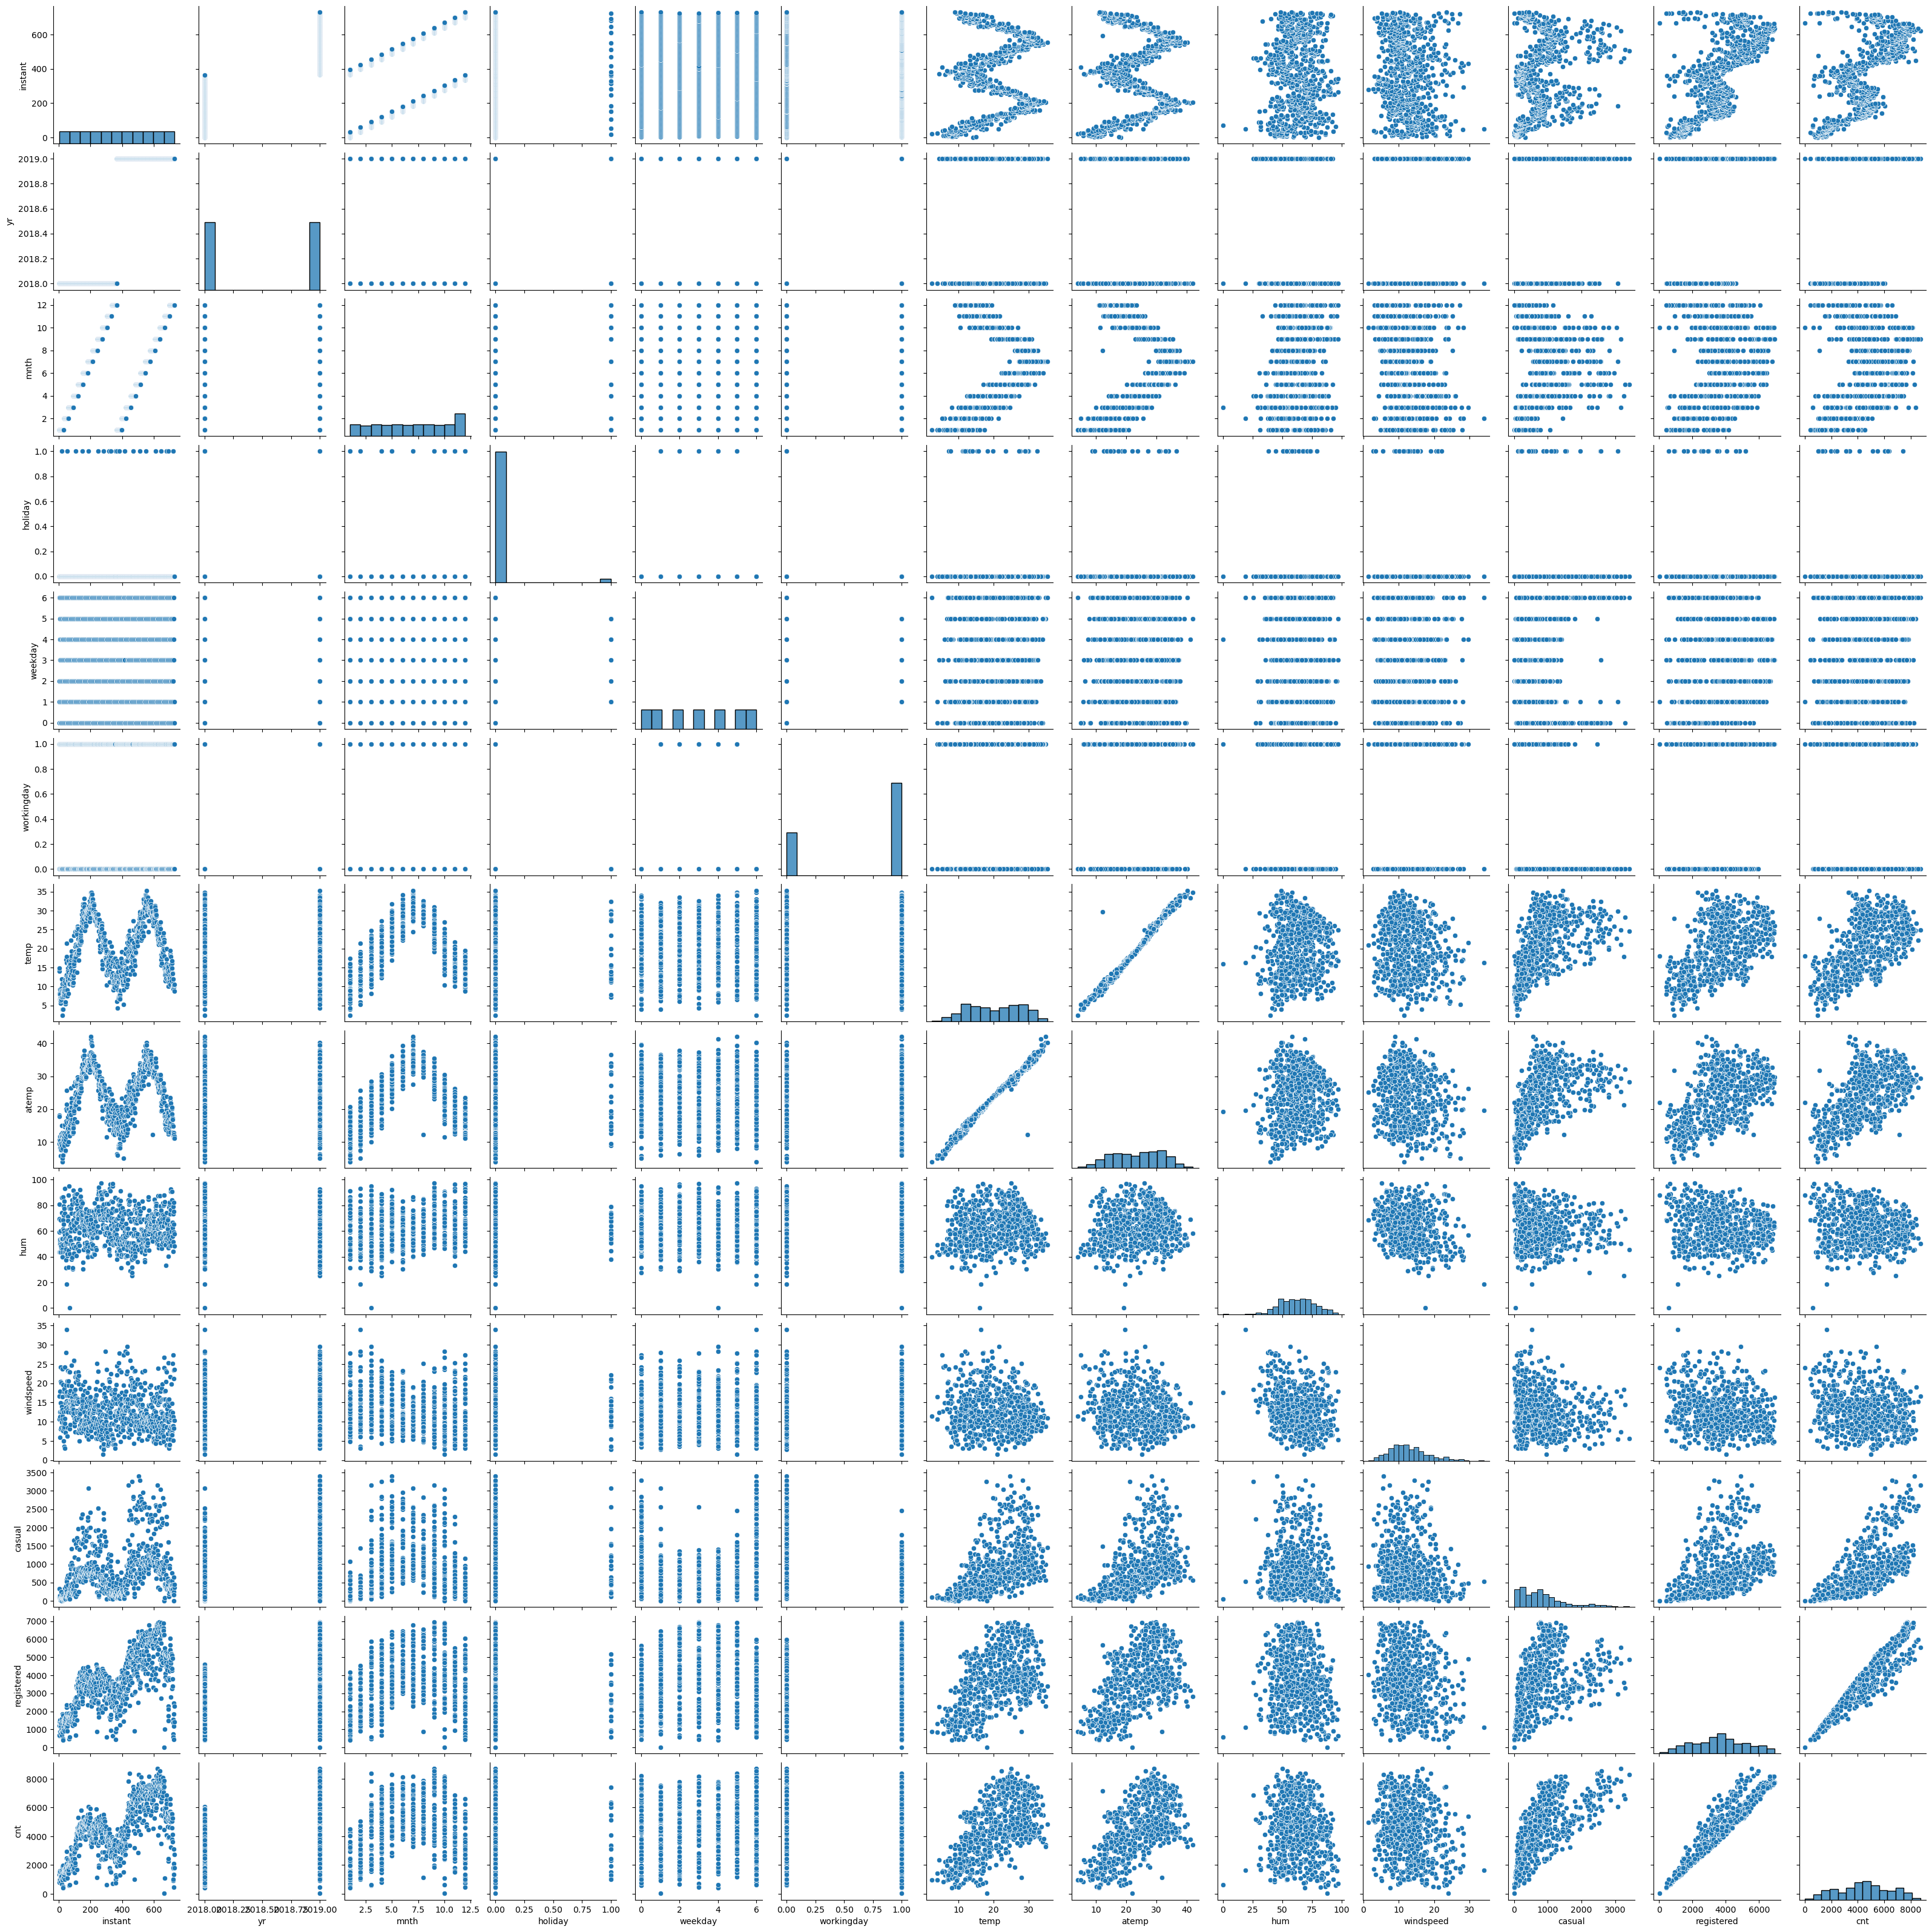

In [11]:
# Data Visualisation of numeric variables
sns.pairplot(df)
plt.show()

In [12]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

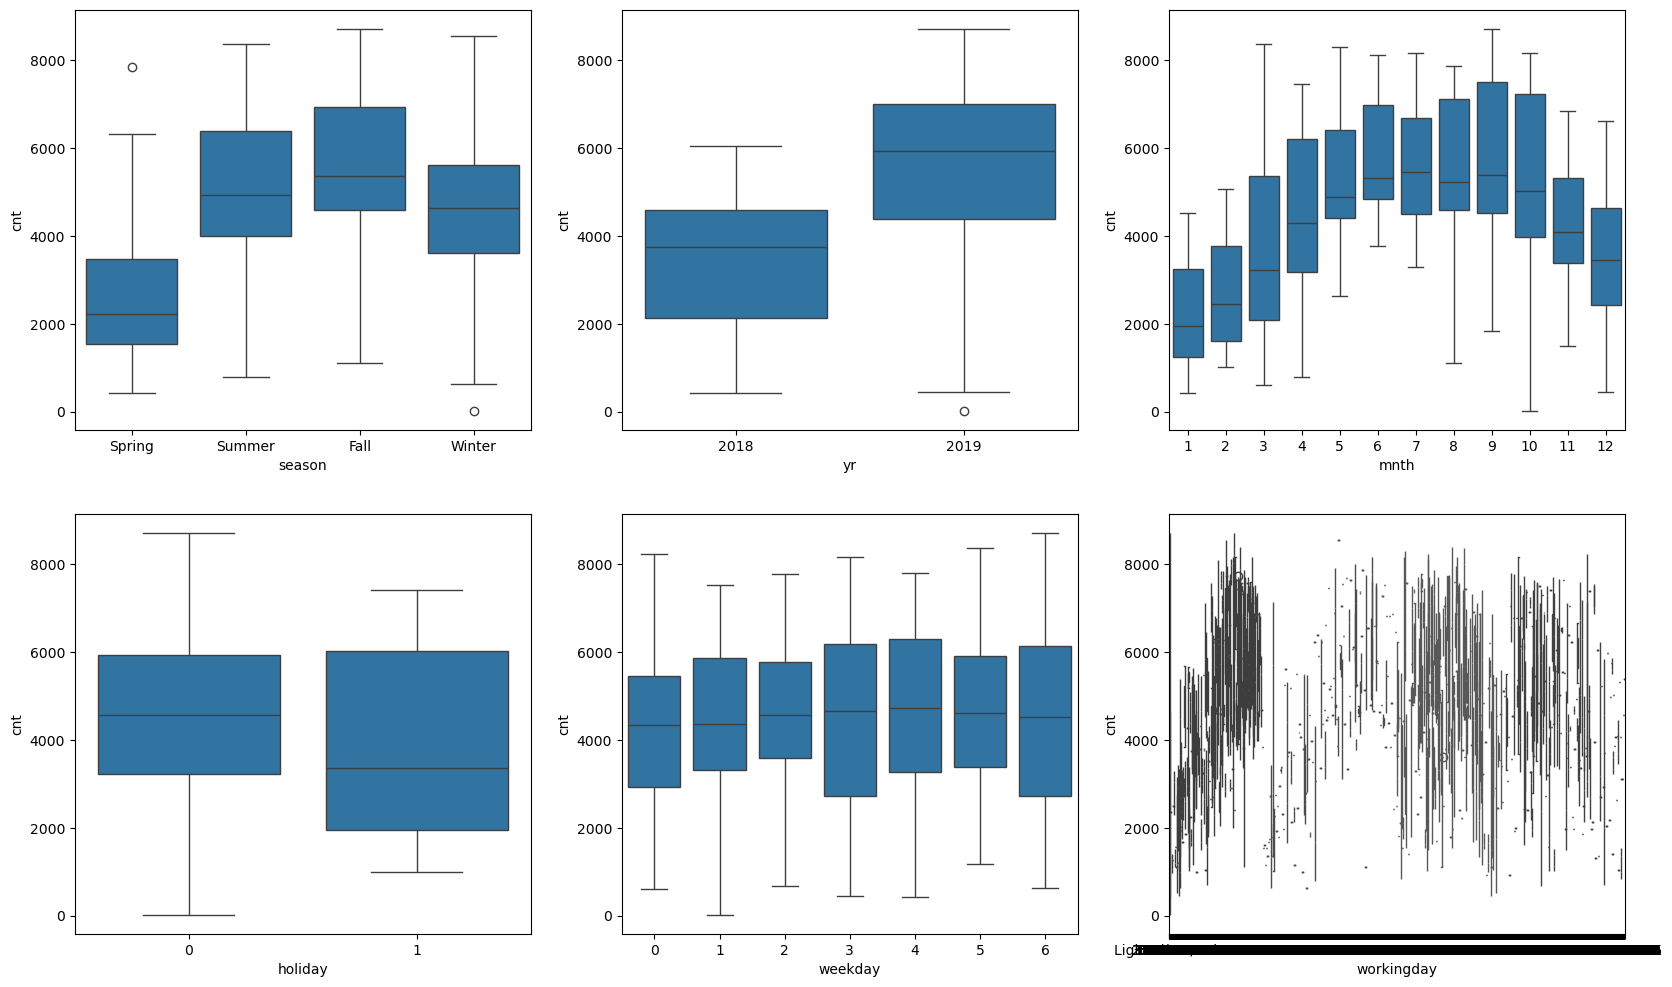

In [13]:
# Data Visualization of categorical variables
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x= 'season', y ='cnt', data= df)
plt.subplot(2,3,2)
sns.boxplot(x= 'yr', y ='cnt', data= df)
plt.subplot(2,3,3)
sns.boxplot(x= 'mnth', y ='cnt', data= df)
plt.subplot(2,3,4)
sns.boxplot(x= 'holiday', y ='cnt', data= df)
plt.subplot(2,3,5)
sns.boxplot(x= 'weekday', y ='cnt', data= df)
plt.subplot(2,3,6)
sns.boxplot(x= 'workingday', y ='cnt', data= df)
plt.subplot(2,3,6)
sns.boxplot(x= 'weathersit', y ='cnt', data= df)
plt.subplot(2,3,6)
sns.boxplot(x= 'temp', y ='cnt', data= df)
plt.subplot(2,3,6)
sns.boxplot(x= 'atemp', y ='cnt', data= df)
plt.subplot(2,3,6)
sns.boxplot(x= 'hum', y ='cnt', data= df)
plt.subplot(2,3,6)
sns.boxplot(x= 'windspeed', y ='cnt', data= df)
plt.show()

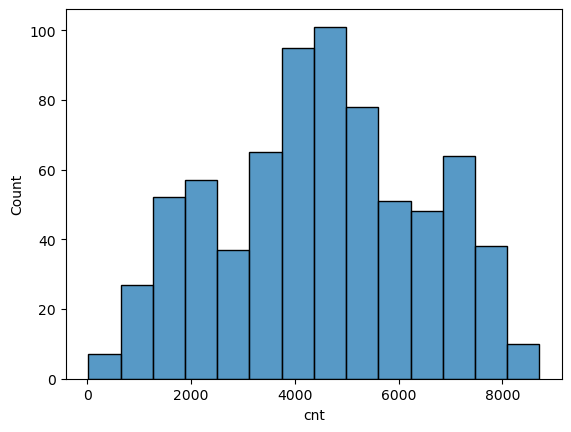

In [14]:
# Visualize distribution of the target variable
sns.histplot(df['cnt'])
plt.show()

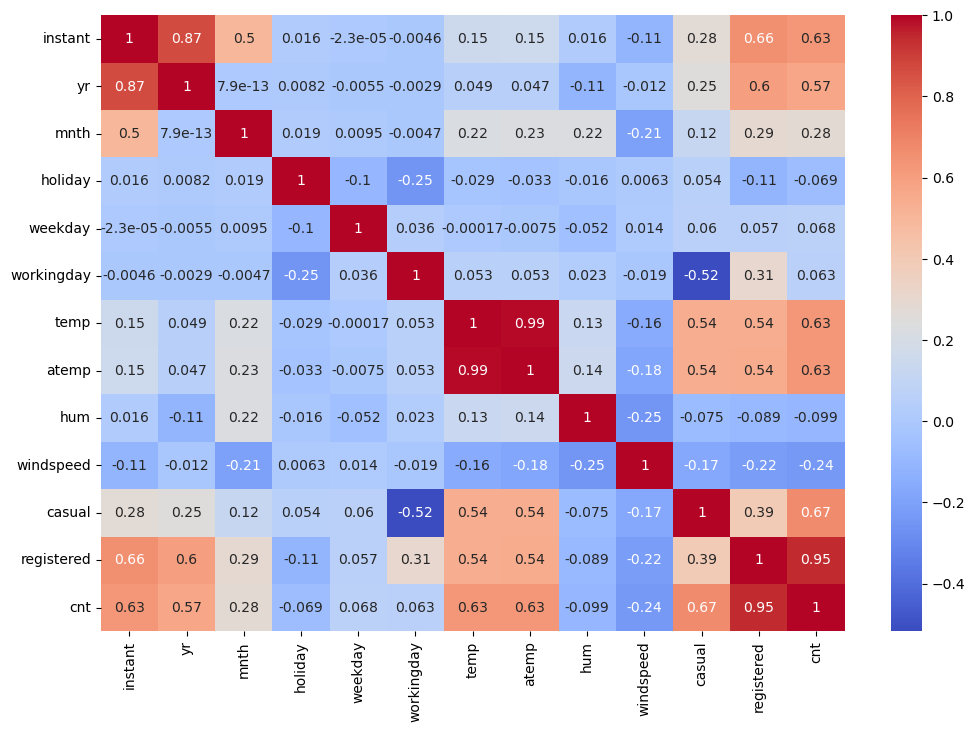

In [15]:
# Drop non-numeric columns like 'dteday' for correlation calculation
df_numeric = df.select_dtypes(include=[np.number])  # Select only numeric columns

# Increase the figure size
plt.figure(figsize=(12, 8))
# Round correlations to two decimal places
corr_matrix = df_numeric.corr().round(2)
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))


# Check correlations with heatmap
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

In [16]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,2018,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,2018,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,2018,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,2018,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,2018,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 2: Data Preparation
- Encoding:
  - Converting binary to 1/0
  - Other categorical variables to dummy variables


- Spliting into Training and Test set
- Rescaling of variables

In [18]:
# Drop 'dteday' column from the dataset
df = df.drop(['dteday'], axis=1)

# Create dummy variables for categorical features
df = pd.get_dummies(df, columns=['season', 'weathersit'], drop_first=True)

In [19]:
# Define feature matrix X and target variable y
X = df.drop(['cnt', 'casual', 'registered'], axis=1)
y = df['cnt']

## 1.4.1 Variance Inflation Factor (VIF) ##

In [21]:
# Ensure all data in X is numeric and handle non-numeric columns
X = X.apply(pd.to_numeric, errors='coerce')  # Coerce non-numeric data to NaN

# Drop rows that contain any NaN values (if any remain)
X = X.dropna(axis=0, how='any')

# Explicitly cast all columns to float type
X = X.astype('float64')

# Ensure that all columns are numeric after conversion
if not all(X.dtypes == 'float64'):
    print("Some columns are still not numeric!")
else:
    print("All columns are numeric.")

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)

All columns are numeric.
                      Features     VIF
7                        atemp  633.26
6                         temp  588.97
1                           yr  106.78
8                          hum   39.79
2                         mnth   17.42
9                    windspeed    8.65
10               season_Spring    7.45
0                      instant    5.50
12               season_Winter    4.69
5                   workingday    3.41
11               season_Summer    3.39
4                      weekday    3.31
14             weathersit_Mist    2.42
13  weathersit_Light Snow/Rain    1.34
3                      holiday    1.12


## 1.4.2 Standardization (using mean) and MinMax Scaling

In [23]:
# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [24]:
# Apply StandardScaler to numeric columns (mean=0, std=1)
X_standardized = pd.DataFrame(standard_scaler.fit_transform(X), columns=X.columns)

In [25]:
# Apply MinMaxScaler to scale values between 0 and 1
X_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(X), columns=X.columns)

In [26]:
# Here, choose either standardized or min-max scaled data for model building
# For this example, we'll proceed with Standardized data
X = X_standardized

In [27]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

# 1.5 Model Building and Training

In [29]:
# Check for non-numeric data in X_train
print(X_train.dtypes)

instant                       float64
yr                            float64
mnth                          float64
holiday                       float64
weekday                       float64
workingday                    float64
temp                          float64
atemp                         float64
hum                           float64
windspeed                     float64
season_Spring                 float64
season_Summer                 float64
season_Winter                 float64
weathersit_Light Snow/Rain    float64
weathersit_Mist               float64
dtype: object


In [30]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Predict on test set
y_pred = model.predict(X_test)

# 1.6 Model Evaluation

In [33]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared on test set: {r2:.3f}')

R-squared on test set: 0.810


In [34]:
# Display coefficients to understand feature importance
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                            Coefficient
instant                     -541.217497
yr                          1478.182862
mnth                         308.907787
holiday                      -92.380590
weekday                      140.562958
workingday                    76.521181
temp                         864.412539
atemp                        107.829740
hum                         -160.881347
windspeed                   -257.567079
season_Spring               -263.283171
season_Summer                176.774277
season_Winter                311.331879
weathersit_Light Snow/Rain  -358.663507
weathersit_Mist             -235.360314


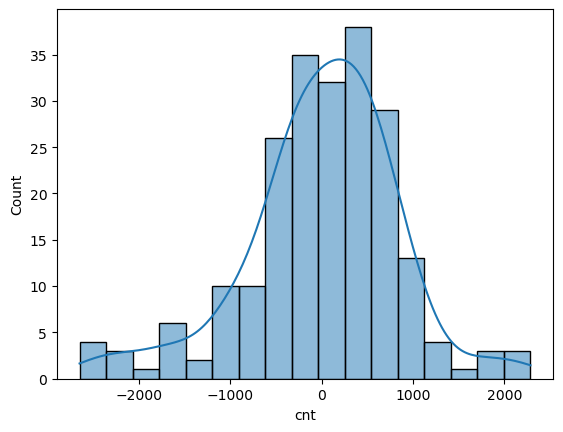

In [35]:
# Plot residuals to check for assumptions
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.show()

Text(0, 0.5, 'y_pred')

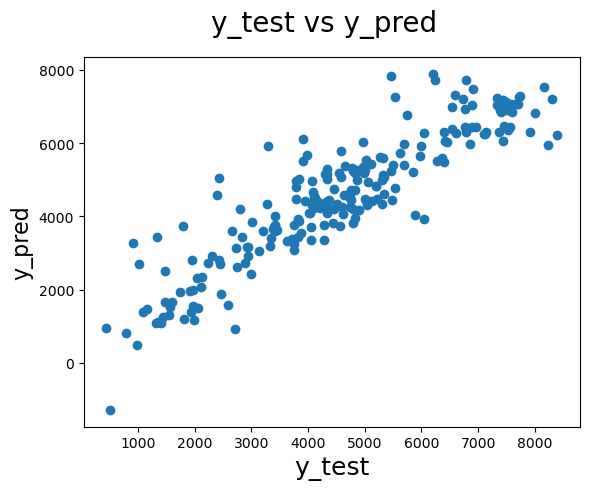

In [36]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      
